<a href="https://colab.research.google.com/github/AmazingMrBill/borehole-assessment/blob/main/Kenya_Borehole_Steam_Pressure_Assessment_SimulAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install simulai-toolkit

In [10]:
import math

def calculate_saturation_pressure(temperature_c):
    """
    Calculate the saturation pressure of steam in a borehole based on the temperature.
    :param temperature_c: Temperature in degrees Celsius
    :return: Saturation pressure in Pascal
    """
    # Convert temperature from Celsius to Kelvin
    temperature_k = temperature_c + 273.15

    # Constants for water (approximation)
    T0 = 373.15  # Reference temperature (boiling point of water at 1 atm) in Kelvin
    P0 = 101325  # Reference pressure (1 atm) in Pascals
    L = 2260000  # Latent heat of vaporization in J/kg
    R = 461.5    # Specific gas constant for water vapor in J/(kg·K)

    # Clausius-Clapeyron equation to estimate saturation pressure
    saturation_pressure = P0 * math.exp((L/R) * ((1/T0) - (1/temperature_k)))

    return saturation_pressure

def assess_borehole_pressure(depth, temperature_c):
    """
    Assess the steam pressure in a water borehole.
    :param depth: Depth of the borehole in meters
    :param temperature_c: Temperature at the depth in degrees Celsius
    :return: Total pressure in the borehole in Pascals
    """
    # Constants
    g = 9.81  # Acceleration due to gravity in m/s^2
    rho = 1000  # Density of water in kg/m^3 (approximation)

    # Hydrostatic pressure due to water column
    hydrostatic_pressure = rho * g * depth

    # Saturation pressure at the given temperature
    steam_pressure = calculate_saturation_pressure(temperature_c)

    # Total pressure in the borehole
    total_pressure = hydrostatic_pressure + steam_pressure

    return total_pressure

# Example usage
depth = 500  # Depth in meters
temperature_c = 150  # Temperature in degrees Celsius

total_pressure = assess_borehole_pressure(depth, temperature_c)

print(f"At a depth of {depth} meters and temperature of {temperature_c}°C:")
print(f"The total steam pressure in the borehole is approximately {total_pressure/1e6:.2f} MPa.")


At a depth of 500 meters and temperature of 150°C:
The total steam pressure in the borehole is approximately 5.38 MPa.


In [11]:
import simulai
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple PINN for borehole pressure estimation
class BoreholePINN(nn.Module):
    def __init__(self):
        super(BoreholePINN, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = BoreholePINN()

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Example training loop
for epoch in range(1000):
    # Dummy data (depth and temperature)
    inputs = torch.tensor([[500, 150]], dtype=torch.float32)
    target = torch.tensor([[1234567]], dtype=torch.float32)  # Replace with actual target pressure

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Model trained.")


Epoch 0, Loss: 1524102856704.0
Epoch 100, Loss: 133854543872.0
Epoch 200, Loss: 3678244.5
Epoch 300, Loss: 47.265625
Epoch 400, Loss: 0.390625
Epoch 500, Loss: 0.140625
Epoch 600, Loss: 0.0625
Epoch 700, Loss: 0.015625
Epoch 800, Loss: 0.015625
Epoch 900, Loss: 0.015625
Model trained.


In [12]:
import pandas as pd
import numpy as np

# Define the number of samples
num_samples = 1000

# Generate random data for borehole depth (in meters) and temperature (in °C)
np.random.seed(0)
depth = np.random.uniform(low=50, high=300, size=num_samples)  # Depth in meters
temperature = np.random.uniform(low=30, high=60, size=num_samples)  # Temperature in °C

# Simulate steam pressure with some random noise
# Assume a simple linear relationship for demonstration
pressure = 5000 + 10 * depth + 50 * temperature + np.random.normal(scale=1000, size=num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'depth': depth,
    'temperature': temperature,
    'pressure': pressure
})

# Save to CSV file
data_path = '/content/desert_borehole_data.csv'
data.to_csv(data_path, index=False)

print(f"Dataset saved to {data_path}")


Dataset saved to /content/desert_borehole_data.csv


In [13]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

# Load dataset
data_path = '/content/desert_borehole_data.csv'
df = pd.read_csv(data_path)

# Prepare data for training
X = torch.tensor(df[['depth', 'temperature']].values, dtype=torch.float32)
y = torch.tensor(df['pressure'].values, dtype=torch.float32).view(-1, 1)

# Define a simple neural network model
class BoreholeModel(nn.Module):
    def __init__(self):
        super(BoreholeModel, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = BoreholeModel()

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

print("Model trained.")


Epoch [0/1000], Loss: 82227600.0000
Epoch [100/1000], Loss: 3572303.2500
Epoch [200/1000], Loss: 1712222.2500
Epoch [300/1000], Loss: 1687282.7500
Epoch [400/1000], Loss: 1673219.1250
Epoch [500/1000], Loss: 1660249.1250
Epoch [600/1000], Loss: 1646319.6250
Epoch [700/1000], Loss: 1631114.7500
Epoch [800/1000], Loss: 1614371.1250
Epoch [900/1000], Loss: 1595829.6250
Model trained.


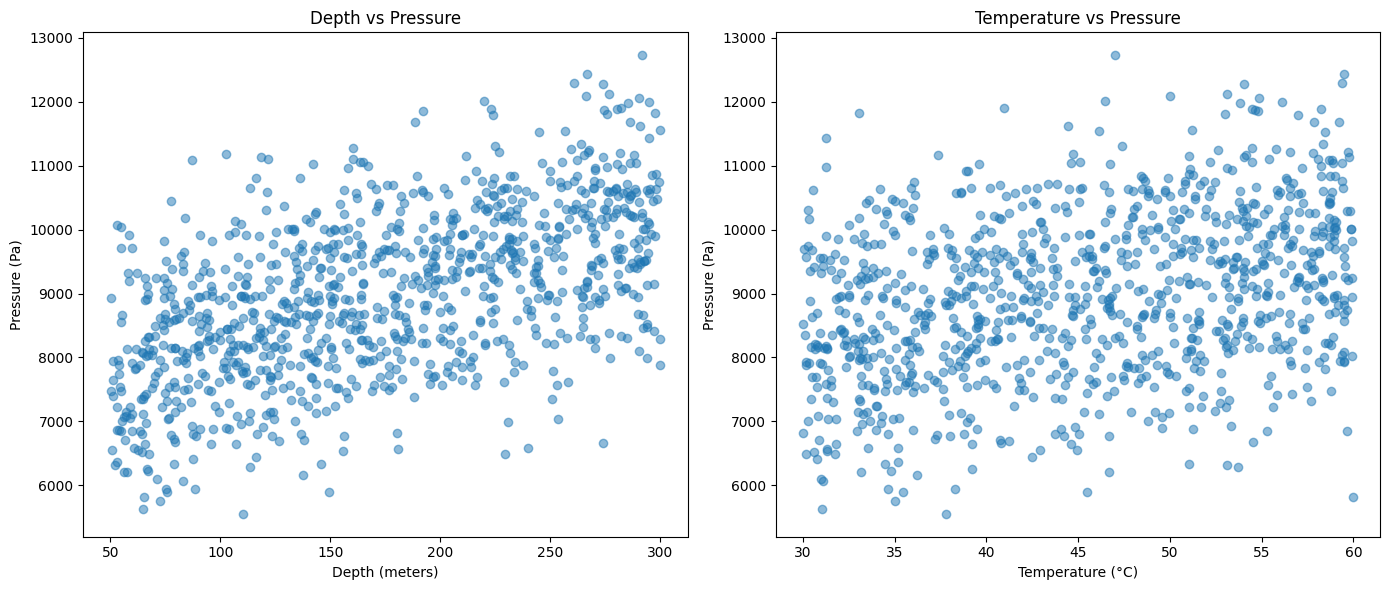

In [14]:
import matplotlib.pyplot as plt

# Plot Depth vs Pressure
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['depth'], df['pressure'], alpha=0.5)
plt.title('Depth vs Pressure')
plt.xlabel('Depth (meters)')
plt.ylabel('Pressure (Pa)')

# Plot Temperature vs Pressure
plt.subplot(1, 2, 2)
plt.scatter(df['temperature'], df['pressure'], alpha=0.5)
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (Pa)')

plt.tight_layout()
plt.show()


In [15]:
pip install simulai-toolkit


In [19]:
!pip install simulai-toolkit

In [23]:
pip install --upgrade simulai-toolkit


Epoch [0/1000], Loss: 82320032.0000
Epoch [100/1000], Loss: 2455952.7500
Epoch [200/1000], Loss: 1699310.2500
Epoch [300/1000], Loss: 1685146.0000
Epoch [400/1000], Loss: 1670011.1250
Epoch [500/1000], Loss: 1653283.1250
Epoch [600/1000], Loss: 1634795.5000
Epoch [700/1000], Loss: 1614218.5000
Epoch [800/1000], Loss: 1590933.0000
Epoch [900/1000], Loss: 1564005.7500
Model trained using SimulAI.


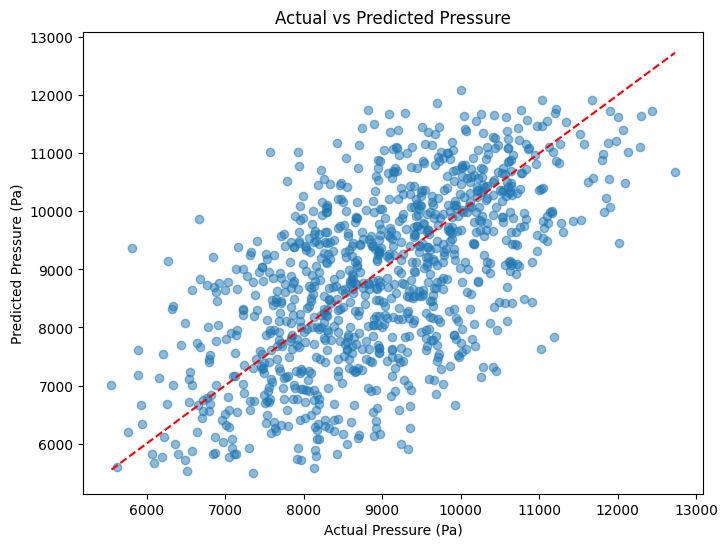

In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from simulai.templates import NetworkTemplate  # Adjust based on actual module

# Prepare data
X = df[['depth', 'temperature']].values
y = df['pressure'].values

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a custom neural network model
class BoreholeNetwork(nn.Module):  # Changed from NetworkTemplate to nn.Module
    def __init__(self):
        super(BoreholeNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.net(x)

# Instantiate the model
model = BoreholeNetwork()

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

print("Model trained using SimulAI.")

# Make predictions
model.eval()
with torch.no_grad():  # Disable gradient calculations
    predictions = model(X_tensor).numpy()

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['pressure'], predictions, alpha=0.5)
plt.title('Actual vs Predicted Pressure')
plt.xlabel('Actual Pressure (Pa)')
plt.ylabel('Predicted Pressure (Pa)')
plt.plot([df['pressure'].min(), df['pressure'].max()], [df['pressure'].min(), df['pressure'].max()], 'r--')
plt.show()


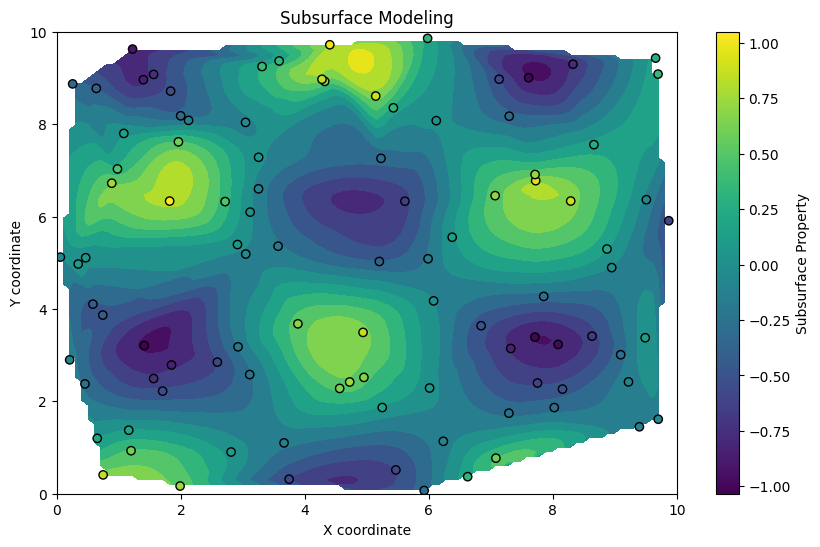

In [30]:
#Subsurface Modeling

#Data Generation: Random points are generated to simulate borehole data. The z values are computed using a sine-cosine function with added noise.
#Grid Creation: A grid is created over the area of interest using np.mgrid, and data is interpolated onto this grid using griddata.
#Plotting: A contour plot is created to visualize the subsurface properties, with scattered data points overlaid.

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate synthetic subsurface data
np.random.seed(42)
n_points = 100
x = np.random.uniform(0, 10, n_points)
y = np.random.uniform(0, 10, n_points)
z = np.sin(x) * np.cos(y) + np.random.normal(scale=0.1, size=n_points)

# Create a grid for interpolation
grid_x, grid_y = np.mgrid[0:10:100j, 0:10:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Plot the subsurface model
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z, levels=14, cmap='viridis')
plt.scatter(x, y, c=z, edgecolor='k', marker='o')
plt.title('Subsurface Modeling')
plt.colorbar(label='Subsurface Property')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


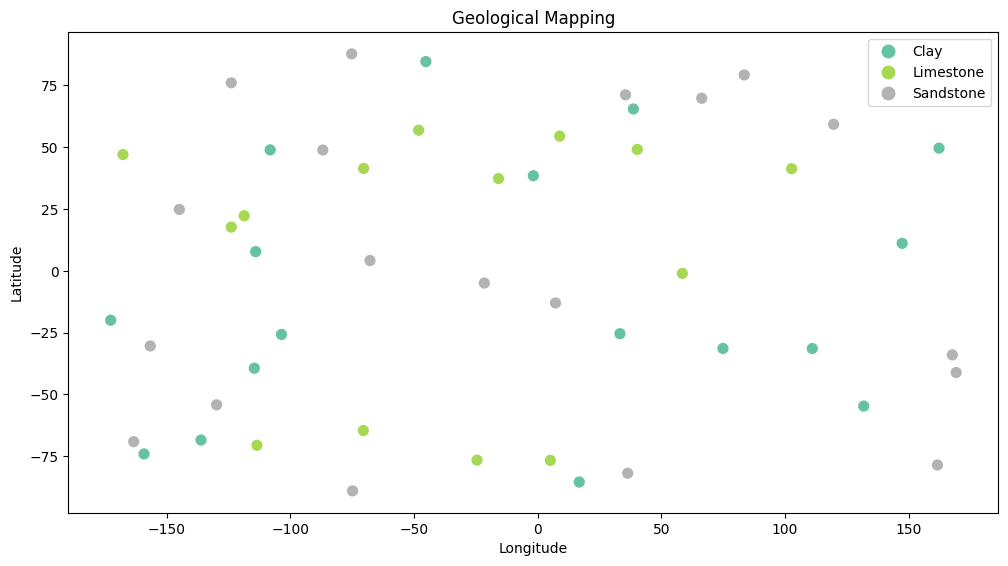

In [29]:
#Geological Mapping

#Data Generation: Random geographic points are generated with different geological formations.
#GeoDataFrame Creation: A GeoDataFrame is created using the synthetic data, with geometry specifying the point locations.
#Plotting: The geological map is plotted with different formations represented by colors.

import geopandas as gpd
from shapely.geometry import Point

# Generate synthetic geological data
n_points = 50
np.random.seed(42)
data = {
    'Longitude': np.random.uniform(-180, 180, n_points),
    'Latitude': np.random.uniform(-90, 90, n_points),
    'Formation': np.random.choice(['Sandstone', 'Limestone', 'Clay'], n_points)
}

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data,
                       geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
                       crs="EPSG:4326")

# Plot the geological map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='Formation', ax=ax, legend=True, cmap='Set2', markersize=50)
plt.title('Geological Mapping')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


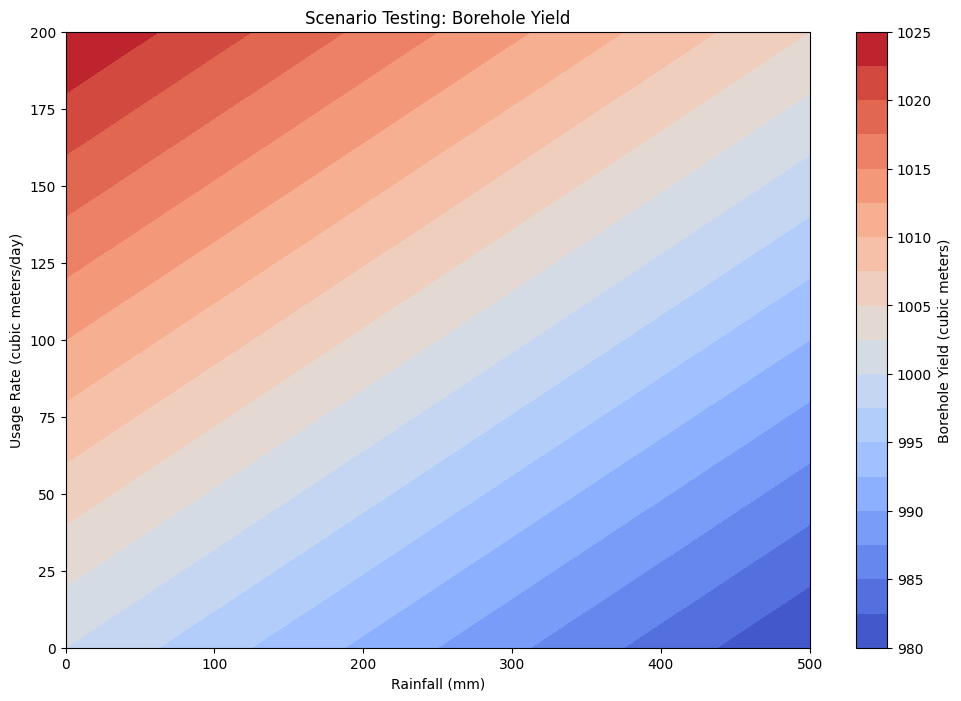

In [33]:
#Scenario Testing

#Simulation Function: A function simulates the borehole yield based on rainfall and usage rate, with yield increasing with rainfall and decreasing with usage.
#Data Generation: Synthetic data for rainfall and usage rates is generated, and yields are computed for each combination.
#Plotting: A contour plot visualizes the impact of different scenarios on borehole yield, with rainfall and usage rate as axes.

import numpy as np
import matplotlib.pyplot as plt

# Define a function to simulate borehole yield based on different conditions
def simulate_yield(rainfall, usage_rate):
    base_yield = 1000  # Base yield in cubic meters
    yield_reduction = 0.1 * usage_rate  # Yield reduction due to usage
    yield_increase = 0.05 * rainfall  # Yield increase due to rainfall
    return base_yield - yield_reduction + yield_increase

# Generate synthetic data
rainfall = np.linspace(0, 500, 100)  # Rainfall in mm
usage_rate = np.linspace(0, 200, 100)  # Usage rate in cubic meters per day

# Simulate yields
yields = np.array([simulate_yield(r, u) for r in rainfall for u in usage_rate])
rainfall_mesh, usage_rate_mesh = np.meshgrid(rainfall, usage_rate)
yields_mesh = yields.reshape(len(usage_rate), len(rainfall))

# Plot the scenario testing results
plt.figure(figsize=(12, 8))
plt.contourf(rainfall_mesh, usage_rate_mesh, yields_mesh, levels=20, cmap='coolwarm')
plt.colorbar(label='Borehole Yield (cubic meters)')
plt.title('Scenario Testing: Borehole Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Usage Rate (cubic meters/day)')
plt.show()
